In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, post_processing_function, plot_beta_errors

ms = load_from_json(deepcopy(math_spec_json))

In [2]:
T = 500
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)

Placeholder has no control action options
     Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0               NaN             NaN           -0.0001            0.0001   
1          4.970541     2257.088763           -0.0001            0.0001   
2         -4.805076    -2040.094941           -0.0001            0.0001   
3         -4.693980    -2017.484774           -0.0001            0.0001   
4         -4.648723    -1399.938367           -0.0001            0.0001   
..              ...             ...               ...               ...   
496        8.303430       20.111661           -0.0001            0.0001   
497        8.302680       38.951431           -0.0001            0.0001   
498        8.301808       44.090106           -0.0001            0.0001   
499        7.187725       -3.180105           -0.0001            0.0001   
500        6.075626      -55.396336           -0.0001            0.0001   

        Qi Supply   Quai Supply  Locked Qi Supply  Locked

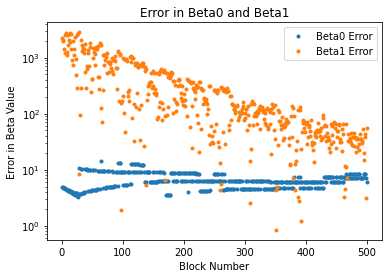

In [3]:
plot_beta_errors(df)